In [40]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
import mpl_scatter_density
from sklearn.mixture import GaussianMixture

In [41]:
data = pd.read_csv('Catalogues/NGC2539_4.csv')
data

,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,120.750245,-12.176855,3036167945540297216,0.0871,0.0647,0.8691,0.1415,3.414,-3.204,0.141,...,1.031,18.310925,19.155960,17.442314,1.713646,NaN,-31.849131,120.750260,-12.176860,0.893827
1,120.748502,-12.169048,3036168014259997824,0.3567,0.2588,0.8023,0.6067,2.525,-2.522,0.528,...,1.033,20.078209,20.758951,19.249168,1.509783,NaN,-31.841959,120.748514,-12.169048,0.798188
2,120.774801,-12.163916,3036173851116718848,0.2784,0.2068,0.7845,0.4647,2.086,-1.933,0.416,...,1.023,19.835163,20.270933,19.323252,0.947681,NaN,-31.830819,120.774810,-12.163912,0.797336
3,120.828863,-12.102368,3036174503951833984,0.3092,0.2460,0.6575,0.5399,2.136,-2.117,0.436,...,1.046,20.013603,20.620640,19.541338,1.079302,NaN,-31.758399,120.828872,-12.102367,0.665763
4,120.830799,-12.110140,3036174508246849152,0.3851,0.2784,0.8398,0.7343,4.241,-4.052,0.606,...,1.015,20.334070,21.634747,19.380322,2.254425,NaN,-31.765490,120.830818,-12.110146,0.819051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12248,122.595626,-10.841704,5728387720230650880,0.2191,0.2004,0.6737,0.3649,3.849,-3.663,0.338,...,1.022,19.428995,20.133577,18.738420,1.395157,NaN,-30.113705,122.595642,-10.841699,0.681967
12249,122.605064,-10.840512,5728387823309867136,0.2117,0.1868,0.5995,0.3435,1.575,-0.521,0.333,...,0.991,19.432290,19.966003,18.762100,1.203903,NaN,-30.110253,122.605066,-10.840505,0.614925
12250,122.441781,-10.867706,5728389644375975424,0.1436,0.1257,0.5921,0.2286,2.406,-2.406,0.236,...,1.031,18.805159,19.301994,18.132660,1.169334,NaN,-30.176260,122.441792,-10.867706,0.614038
12251,122.439955,-10.866530,5728389644376189952,0.1428,0.1257,0.6225,0.2265,2.891,-2.606,0.237,...,0.997,18.811468,19.214546,18.213182,1.001364,NaN,-30.175563,122.439967,-10.866535,0.644494


In [42]:
df1 = pd.read_csv('Catalogues/NGC2539_norm2_5.csv')
df1

,RAJ2000,DEJ2000,pmRA,pmDE,BP-RP,Plx_corr
0,-1.788664,0.701279,-1.107999,1.284502,1.063224,1.955411
1,-1.790419,0.709317,-0.437917,0.228513,0.573657,0.822740
2,-1.763994,0.714603,0.140791,-0.671919,-0.776204,0.812650
3,-1.709667,0.777938,-0.039994,-0.174338,-0.460122,-0.745594
4,-1.707712,0.769933,-1.941181,1.357294,2.361879,1.069825
...,...,...,...,...,...,...
12248,0.065758,2.075272,-1.558978,-1.068787,0.298388,-0.553687
12249,0.075228,2.076500,1.528117,-1.372920,-0.160899,-1.347678
12250,-0.088846,2.048508,-0.323944,0.124809,-0.243915,-1.358183
12251,-0.090680,2.049713,-0.520449,1.356297,-0.647287,-0.997487


In [43]:
#df1 = df1.to_pandas()
df1 = df1.fillna(0).values 

In [44]:
df1 = pd.DataFrame(df1)

In [45]:
df1= df1.rename(columns={0: 'RAJ2000', 1: 'DEJ2000', 2: 'pmRA', 3 : 'pmDE', 4: 'BP-RP',
                         5: 'Plx_corr'})
df1

,RAJ2000,DEJ2000,pmRA,pmDE,BP-RP,Plx_corr
0,-1.788664,0.701279,-1.107999,1.284502,1.063224,1.955411
1,-1.790419,0.709317,-0.437917,0.228513,0.573657,0.822740
2,-1.763994,0.714603,0.140791,-0.671919,-0.776204,0.812650
3,-1.709667,0.777938,-0.039994,-0.174338,-0.460122,-0.745594
4,-1.707712,0.769933,-1.941181,1.357294,2.361879,1.069825
...,...,...,...,...,...,...
12248,0.065758,2.075272,-1.558978,-1.068787,0.298388,-0.553687
12249,0.075228,2.076500,1.528117,-1.372920,-0.160899,-1.347678
12250,-0.088846,2.048508,-0.323944,0.124809,-0.243915,-1.358183
12251,-0.090680,2.049713,-0.520449,1.356297,-0.647287,-0.997487


In [7]:
gmm = GaussianMixture(n_components = 5, tol=1e-7, max_iter=1000, random_state=60).fit(df1)

In [8]:
cluster = gmm.predict(df1)
df1['cluster'] = cluster

In [9]:
df1.cluster.value_counts()

cluster
3    4574
1    2994
2    2981
4    1172
0     532
Name: count, dtype: int64

In [10]:
df2 = data.assign(cluster=df1["cluster"])

In [11]:
a1 = df2[df2["cluster"]==0]
a2 = df2[df2["cluster"]==1]
a3 = df2[df2["cluster"]==2]
a4 = df2[df2["cluster"]==3]
a5 = df2[df2["cluster"]==4]

/opt/anaconda3/envs/analysis-env/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, 'Gmag (mag)')

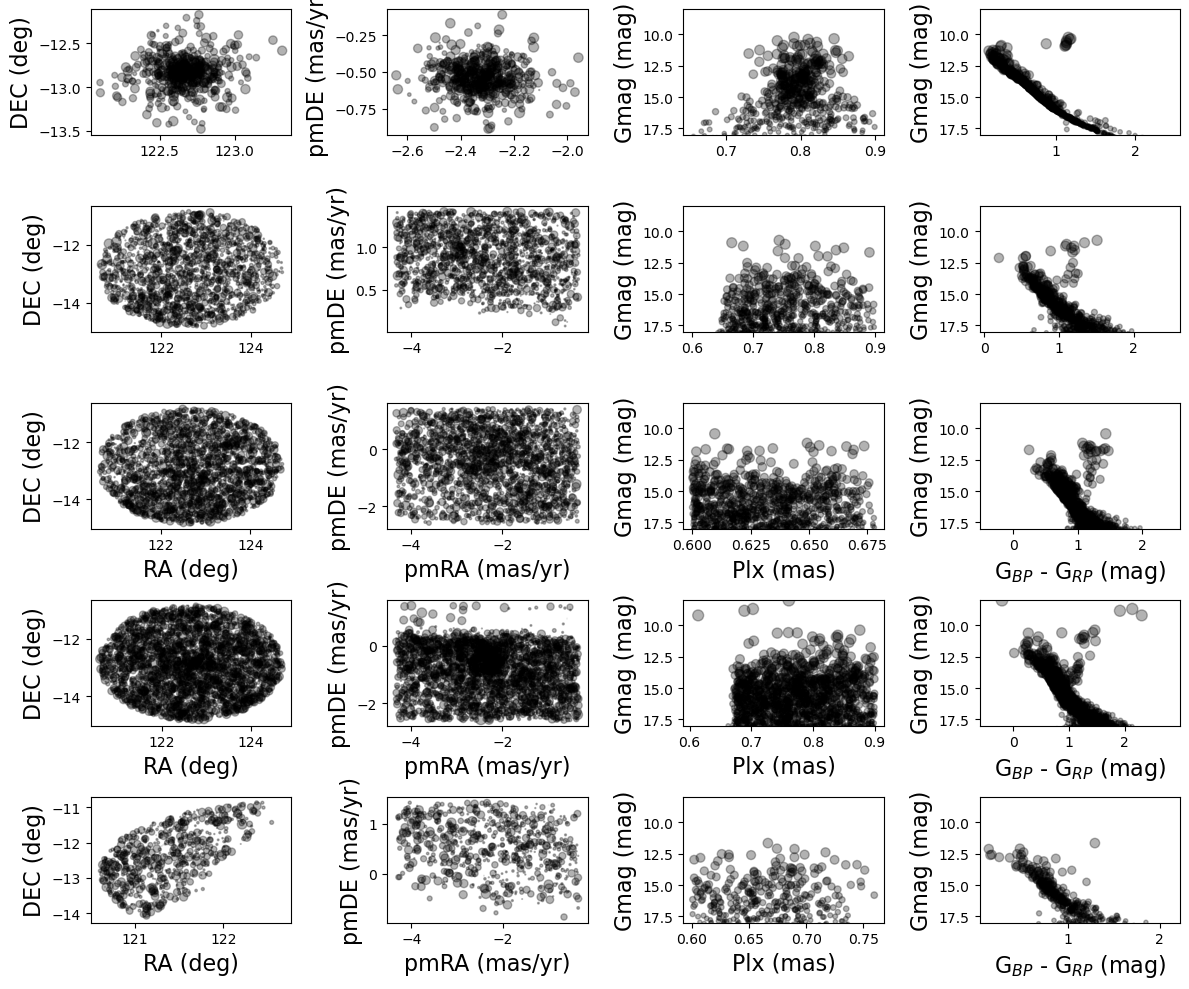

In [12]:
fig,ax = plt.subplots(5,4, figsize=(12,10),tight_layout=True)

ax[0,0].scatter(a1.RAJ2000, a1.DEJ2000, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,0].set_ylabel("DEC (deg)",fontsize=16)
ax[0,1].scatter(a1.pmRA, a1.pmDE, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[0,2].scatter(a1.Plx_corr, a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,2].set_ylim(18,8)
ax[0,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[0,3].scatter(a1["BP-RP"], a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,3].set_ylim(18,8)
ax[0,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[1,0].scatter(a2.RAJ2000, a2.DEJ2000, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,0].set_ylabel("DEC (deg)",fontsize=16)
ax[1,1].scatter(a2.pmRA, a2.pmDE, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[1,2].scatter(a2.Plx_corr, a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,2].set_ylim(18,8)
ax[1,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[1,3].scatter(a2["BP-RP"], a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,3].set_ylim(18,8)
ax[1,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[2,0].scatter(a3.RAJ2000, a3.DEJ2000, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,0].set_xlabel("RA (deg)",fontsize=16)
ax[2,0].set_ylabel("DEC (deg)",fontsize=16)
ax[2,1].scatter(a3.pmRA, a3.pmDE, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[2,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[2,2].scatter(a3.Plx_corr, a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,2].set_ylim(18,8)
ax[2,2].set_xlabel("Plx (mas)",fontsize=16)
ax[2,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[2,3].scatter(a3["BP-RP"], a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,3].set_ylim(18,8)
ax[2,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[2,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[3,0].scatter(a4.RAJ2000, a4.DEJ2000, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,0].set_xlabel("RA (deg)",fontsize=16)
ax[3,0].set_ylabel("DEC (deg)",fontsize=16)
ax[3,1].scatter(a4.pmRA, a4.pmDE, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[3,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[3,2].scatter(a4.Plx_corr, a4.Gmag, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,2].set_ylim(18,8)
ax[3,2].set_xlabel("Plx (mas)",fontsize=16)
ax[3,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[3,3].scatter(a4["BP-RP"], a4.Gmag, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,3].set_ylim(18,8)
ax[3,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[3,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[4,0].scatter(a5.RAJ2000, a5.DEJ2000, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,0].set_xlabel("RA (deg)",fontsize=16)
ax[4,0].set_ylabel("DEC (deg)",fontsize=16)
ax[4,1].scatter(a5.pmRA, a5.pmDE, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[4,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[4,2].scatter(a5.Plx_corr, a5.Gmag, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,2].set_ylim(18,8)
ax[4,2].set_xlabel("Plx (mas)",fontsize=16)
ax[4,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[4,3].scatter(a5["BP-RP"], a5.Gmag, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,3].set_ylim(18,8)
ax[4,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[4,3].set_ylabel("Gmag (mag)",fontsize=16)

## Try 2

In [46]:
gmm = GaussianMixture(n_components = 3, tol=1e-7, max_iter=1000, random_state=60).fit(df1)

In [47]:
cluster = gmm.predict(df1)
df1['cluster'] = cluster

In [48]:
df1.cluster.value_counts()

cluster
0    5451
2    3646
1    3156
Name: count, dtype: int64

In [49]:
df2 = data.assign(cluster=df1["cluster"])

In [50]:
a1 = df2[df2["cluster"]==0]
a2 = df2[df2["cluster"]==1]
a3 = df2[df2["cluster"]==2]

/opt/anaconda3/envs/analysis-env/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, 'Gmag (mag)')

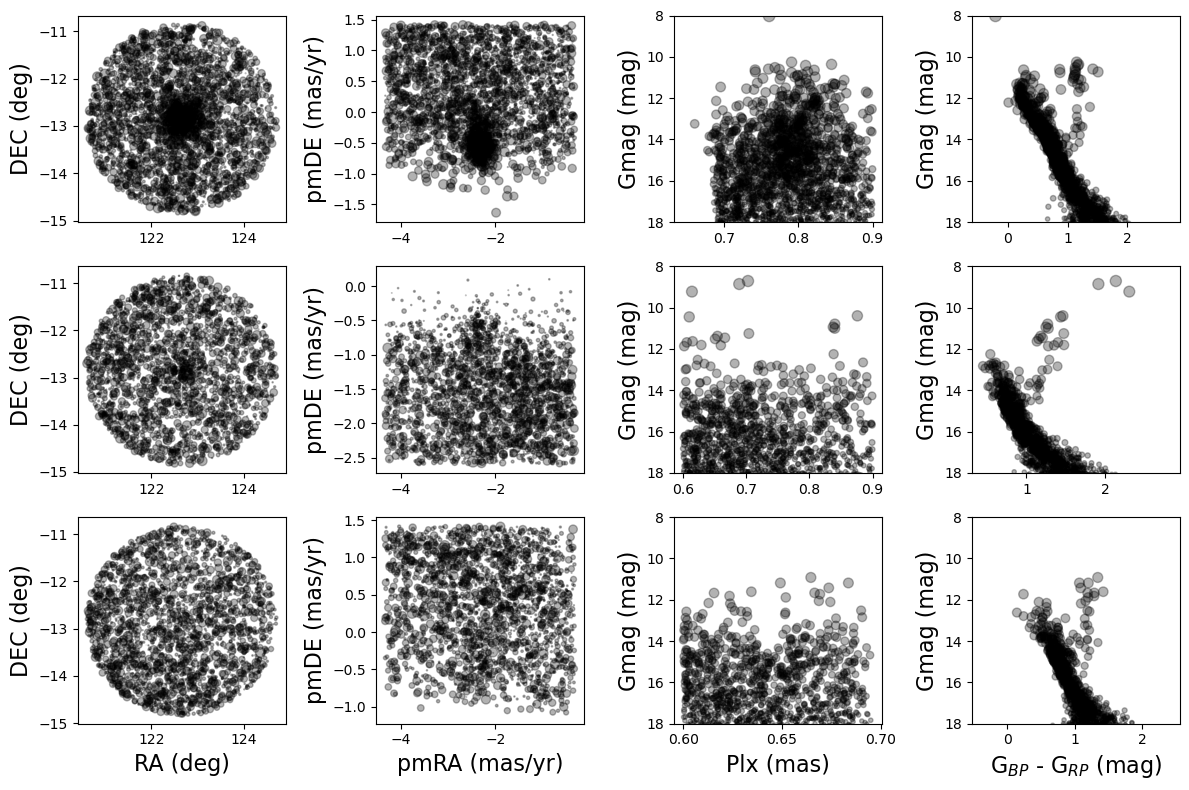

In [51]:
fig,ax = plt.subplots(3,4, figsize=(12,8),tight_layout=True)

ax[0,0].scatter(a1.RAJ2000, a1.DEJ2000, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,0].set_ylabel("DEC (deg)",fontsize=16)
ax[0,1].scatter(a1.pmRA, a1.pmDE, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[0,2].scatter(a1.Plx_corr, a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,2].set_ylim(18,8)
ax[0,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[0,3].scatter(a1["BP-RP"], a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,3].set_ylim(18,8)
ax[0,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[1,0].scatter(a2.RAJ2000, a2.DEJ2000, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,0].set_ylabel("DEC (deg)",fontsize=16)
ax[1,1].scatter(a2.pmRA, a2.pmDE, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[1,2].scatter(a2.Plx_corr, a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,2].set_ylim(18,8)
ax[1,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[1,3].scatter(a2["BP-RP"], a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,3].set_ylim(18,8)
ax[1,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[2,0].scatter(a3.RAJ2000, a3.DEJ2000, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,0].set_xlabel("RA (deg)",fontsize=16)
ax[2,0].set_ylabel("DEC (deg)",fontsize=16)
ax[2,1].scatter(a3.pmRA, a3.pmDE, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[2,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[2,2].scatter(a3.Plx_corr, a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,2].set_ylim(18,8)
ax[2,2].set_xlabel("Plx (mas)",fontsize=16)
ax[2,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[2,3].scatter(a3["BP-RP"], a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,3].set_ylim(18,8)
ax[2,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[2,3].set_ylabel("Gmag (mag)",fontsize=16)


## Try 3

In [38]:
df1=a1
df1

,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,120.750245,-12.176855,3036167945540297216,0.0871,0.0647,0.8691,0.1415,3.414,-3.204,0.141,...,1.031,18.310925,19.155960,17.442314,1.713646,NaN,-31.849131,120.750260,-12.176860,0.893827
1,120.748502,-12.169048,3036168014259997824,0.3567,0.2588,0.8023,0.6067,2.525,-2.522,0.528,...,1.033,20.078209,20.758951,19.249168,1.509783,NaN,-31.841959,120.748514,-12.169048,0.798188
2,120.774801,-12.163916,3036173851116718848,0.2784,0.2068,0.7845,0.4647,2.086,-1.933,0.416,...,1.023,19.835163,20.270933,19.323252,0.947681,NaN,-31.830819,120.774810,-12.163912,0.797336
4,120.830799,-12.110140,3036174508246849152,0.3851,0.2784,0.8398,0.7343,4.241,-4.052,0.606,...,1.015,20.334070,21.634747,19.380322,2.254425,NaN,-31.765490,120.830818,-12.110146,0.819051
10,120.865892,-12.053844,3036176260594179968,0.3226,0.2353,0.8302,0.5866,1.703,-1.330,0.447,...,1.032,20.021528,20.645718,19.416590,1.229128,NaN,-31.702607,120.865898,-12.053849,0.845315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12231,122.950038,-10.875279,5728377137430686464,0.5356,0.4344,0.7849,0.8926,1.754,-1.750,0.865,...,1.005,20.386703,20.888035,19.657074,1.230961,NaN,-30.059608,122.950046,-10.875278,0.809587
12237,122.538909,-10.915045,5728385456786179584,0.1651,0.1537,0.7426,0.2426,1.298,-0.960,0.252,...,1.004,19.035507,19.406060,18.552877,0.853182,NaN,-30.198554,122.538913,-10.915049,0.757974
12240,122.532428,-10.872480,5728386143977005440,0.6301,0.5862,0.8346,0.9974,1.789,-1.451,1.059,...,1.034,20.602892,20.914776,20.015713,0.899063,NaN,-30.158888,122.532434,-10.872476,0.829929
12241,122.572126,-10.871759,5728386178338960640,0.1460,0.1316,0.7025,0.2213,1.382,-1.351,0.215,...,1.070,18.670115,18.940420,18.207432,0.732988,NaN,-30.148539,122.572132,-10.871757,0.725627


In [35]:
#df1 = df1.to_pandas()
df1 = df1.fillna(0).values 

In [32]:
gmm = GaussianMixture(n_components = 3, tol=1e-7, max_iter=1000, random_state=60).fit(df1)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [ ]:
cluster = gmm.predict(df1)
df1['cluster'] = cluster

In [19]:
df1.cluster.value_counts()

cluster
0    5451
2    3646
1    3156
Name: count, dtype: int64

In [20]:
df2 = data.assign(cluster=df1["cluster"])

In [21]:
a1 = df2[df2["cluster"]==0]
a2 = df2[df2["cluster"]==1]
a3 = df2[df2["cluster"]==2]

Text(0, 0.5, 'Gmag (mag)')

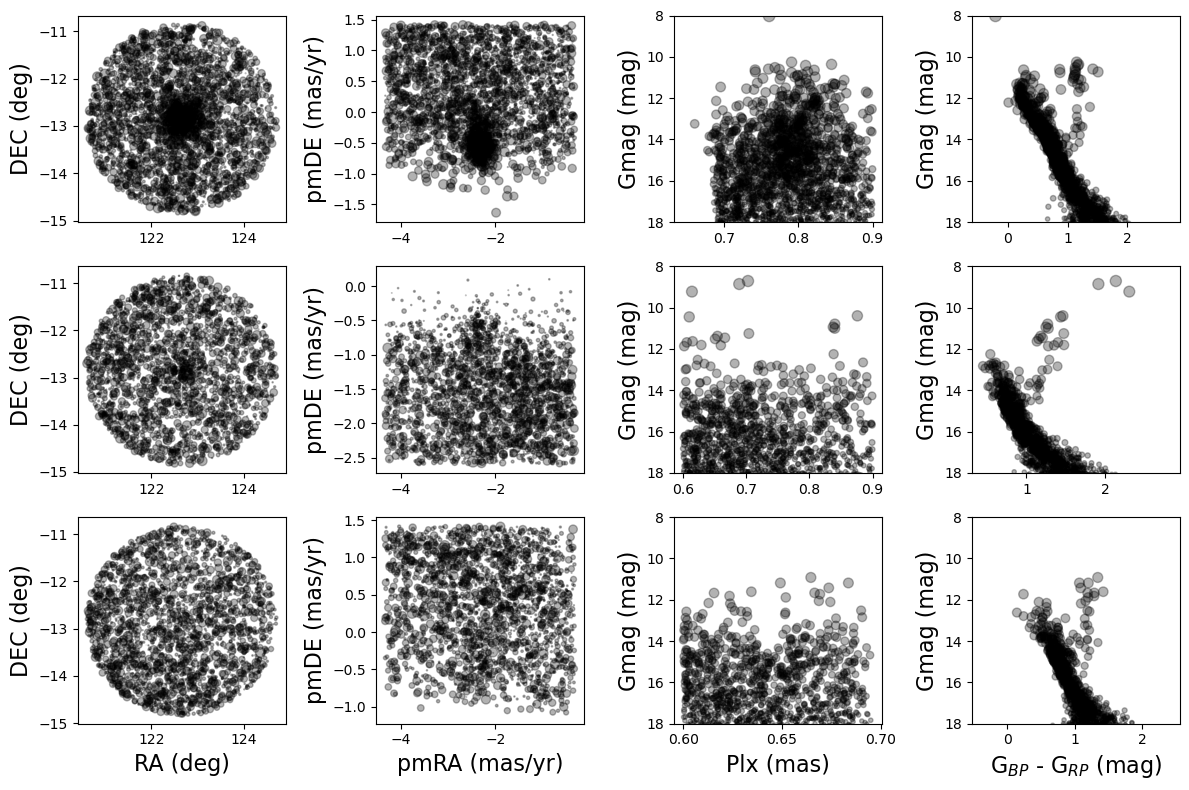

In [23]:
fig,ax = plt.subplots(3,4, figsize=(12,8),tight_layout=True)

ax[0,0].scatter(a1.RAJ2000, a1.DEJ2000, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,0].set_ylabel("DEC (deg)",fontsize=16)
ax[0,1].scatter(a1.pmRA, a1.pmDE, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[0,2].scatter(a1.Plx_corr, a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,2].set_ylim(18,8)
ax[0,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[0,3].scatter(a1["BP-RP"], a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,3].set_ylim(18,8)
ax[0,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[1,0].scatter(a2.RAJ2000, a2.DEJ2000, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,0].set_ylabel("DEC (deg)",fontsize=16)
ax[1,1].scatter(a2.pmRA, a2.pmDE, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[1,2].scatter(a2.Plx_corr, a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,2].set_ylim(18,8)
ax[1,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[1,3].scatter(a2["BP-RP"], a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,3].set_ylim(18,8)
ax[1,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[2,0].scatter(a3.RAJ2000, a3.DEJ2000, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,0].set_xlabel("RA (deg)",fontsize=16)
ax[2,0].set_ylabel("DEC (deg)",fontsize=16)
ax[2,1].scatter(a3.pmRA, a3.pmDE, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[2,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[2,2].scatter(a3.Plx_corr, a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,2].set_ylim(18,8)
ax[2,2].set_xlabel("Plx (mas)",fontsize=16)
ax[2,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[2,3].scatter(a3["BP-RP"], a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,3].set_ylim(18,8)
ax[2,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[2,3].set_ylabel("Gmag (mag)",fontsize=16)


In [25]:
a1 = a1.drop(columns=["cluster"])

In [26]:
a1

,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,120.750245,-12.176855,3036167945540297216,0.0871,0.0647,0.8691,0.1415,3.414,-3.204,0.141,...,1.031,18.310925,19.155960,17.442314,1.713646,NaN,-31.849131,120.750260,-12.176860,0.893827
1,120.748502,-12.169048,3036168014259997824,0.3567,0.2588,0.8023,0.6067,2.525,-2.522,0.528,...,1.033,20.078209,20.758951,19.249168,1.509783,NaN,-31.841959,120.748514,-12.169048,0.798188
2,120.774801,-12.163916,3036173851116718848,0.2784,0.2068,0.7845,0.4647,2.086,-1.933,0.416,...,1.023,19.835163,20.270933,19.323252,0.947681,NaN,-31.830819,120.774810,-12.163912,0.797336
4,120.830799,-12.110140,3036174508246849152,0.3851,0.2784,0.8398,0.7343,4.241,-4.052,0.606,...,1.015,20.334070,21.634747,19.380322,2.254425,NaN,-31.765490,120.830818,-12.110146,0.819051
10,120.865892,-12.053844,3036176260594179968,0.3226,0.2353,0.8302,0.5866,1.703,-1.330,0.447,...,1.032,20.021528,20.645718,19.416590,1.229128,NaN,-31.702607,120.865898,-12.053849,0.845315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12231,122.950038,-10.875279,5728377137430686464,0.5356,0.4344,0.7849,0.8926,1.754,-1.750,0.865,...,1.005,20.386703,20.888035,19.657074,1.230961,NaN,-30.059608,122.950046,-10.875278,0.809587
12237,122.538909,-10.915045,5728385456786179584,0.1651,0.1537,0.7426,0.2426,1.298,-0.960,0.252,...,1.004,19.035507,19.406060,18.552877,0.853182,NaN,-30.198554,122.538913,-10.915049,0.757974
12240,122.532428,-10.872480,5728386143977005440,0.6301,0.5862,0.8346,0.9974,1.789,-1.451,1.059,...,1.034,20.602892,20.914776,20.015713,0.899063,NaN,-30.158888,122.532434,-10.872476,0.829929
12241,122.572126,-10.871759,5728386178338960640,0.1460,0.1316,0.7025,0.2213,1.382,-1.351,0.215,...,1.070,18.670115,18.940420,18.207432,0.732988,NaN,-30.148539,122.572132,-10.871757,0.725627


In [39]:
#a1.to_csv('Catalogues/NGC2539_6.csv', index=False) 

In [52]:
b1 = df1[df1["cluster"]==0]

In [54]:
b1 = b1.drop(columns=["cluster"])

In [55]:
#b1.to_csv('Catalogues/NGC2539_norm3_7.csv', index=False) 